## Credit Card Lead Prediction

 Happy Customer Bank is a mid-sized private bank that deals in all kinds of banking products, like Savings accounts, Current accounts, investment products, credit products, among other offerings.

 The bank also cross-sells products to its existing customers and to do so they use different kinds of communication like tele-calling, e-mails, recommendations on net banking, mobile banking, etc. 

 In this case, the Happy Customer Bank wants to cross sell its credit cards to its existing customers. The bank has identified a set of customers that are eligible for taking these credit cards.

 Now, the bank is looking for your help in identifying customers that could show higher intent towards a recommended credit card, given:

 Customer details (gender, age, region etc.)

 Details of his/her relationship with the bank (Channel_Code,Vintage, 'Avg_Asset_Value etc.)


In [1]:
# Data Dictionary 


# Variable                                     Definition

# ID                                           Unique Identifier for a row

# Gender                                       Gender of the Customer

# Age                                          Age of the Customer (in Years)

# Region_Code                                  Code of the Region for the customers

# Occupation                                   Occupation Type for the customer

# Channel_Code                                 Acquisition Channel Code for the Customer  (Encoded)

# Vintage                                      Vintage for the Customer (In Months)

# Credit_Product                               If the Customer has any active credit product (Home loan,
#                                                                             Personal loan, Credit Card etc.)

# Avg_Account_Balance                          Average Account Balance for the Customer in last 12 Months

# Is_Active                                    If the Customer is Active in last 3 Months

# Is_Lead(Target)                              If the Customer is interested for the Credit Card
#                                              0 : Customer is not interested
#                                              1 : Customer is interested

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [4]:
df_train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [5]:
df_test.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


In [6]:
df_train.shape

(245725, 11)

In [7]:
df_test.shape

(105312, 10)

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
ID                     245725 non-null object
Gender                 245725 non-null object
Age                    245725 non-null int64
Region_Code            245725 non-null object
Occupation             245725 non-null object
Channel_Code           245725 non-null object
Vintage                245725 non-null int64
Credit_Product         216400 non-null object
Avg_Account_Balance    245725 non-null int64
Is_Active              245725 non-null object
Is_Lead                245725 non-null int64
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [9]:
# check total number of records

df_train.shape

(245725, 11)

In [10]:
# check training Dataframe columns unique values

pd.DataFrame(df_train.nunique())

,0
ID,245725
Gender,2
Age,63
Region_Code,35
Occupation,4
Channel_Code,4
Vintage,66
Credit_Product,2
Avg_Account_Balance,135292
Is_Active,2


In [11]:
# as i see in Credit_Product have missing value in training dataframe. so first we work on it 

df_train.isnull().sum()

# total NAN values is 29325 in 245725

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [12]:
# check unique values in credit product column

df_train.Credit_Product.unique()

array(['No', nan, 'Yes'], dtype=object)

In [13]:
df_train.Region_Code.unique()

array(['RG268', 'RG277', 'RG270', 'RG282', 'RG261', 'RG265', 'RG283',
       'RG254', 'RG269', 'RG257', 'RG279', 'RG280', 'RG252', 'RG284',
       'RG259', 'RG281', 'RG258', 'RG266', 'RG260', 'RG274', 'RG256',
       'RG275', 'RG273', 'RG267', 'RG272', 'RG251', 'RG262', 'RG264',
       'RG278', 'RG276', 'RG263', 'RG250', 'RG255', 'RG253', 'RG271'],
      dtype=object)

In [14]:
# check mode 

df_train.Credit_Product.mode()

0    No
dtype: object

In [15]:
# as i see in credit product having three unique values (Yes,No and Nan) and see the mode is NO. So,
# i replace no with Nan

df_train['Credit_Product'].fillna('No', inplace = True)   

In [16]:
df_train.Credit_Product.unique()

array(['No', 'Yes'], dtype=object)

In [17]:
df_train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [18]:
# describe help for Statistical analysis 

df_train.describe().round(2)

,Age,Vintage,Avg_Account_Balance,Is_Lead
count,245725.00,245725.00,245725.00,245725.00
mean,43.86,46.96,1128403.10,0.24
std,14.83,32.35,852936.36,0.43
min,23.00,7.00,20790.00,0.00
25%,30.00,20.00,604310.00,0.00
50%,43.00,32.00,894601.00,0.00
75%,54.00,73.00,1366666.00,0.00
max,85.00,135.00,10352009.00,1.00


{'whiskers': [<matplotlib.lines.Line2D at 0x7fc4f6698cd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc4f66a6750>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc4f6687f90>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc4f66a6cd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc4f66ae6d0>],
 'means': []}

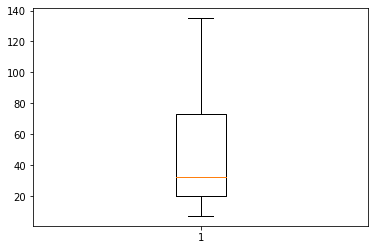

In [19]:
# here i see is there any outliers

plt.boxplot(df_train['Vintage'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc4f4dd2350>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc4f4dd2e10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc4f4dcc750>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc4f4dda890>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc4f4ddad90>],
 'means': []}

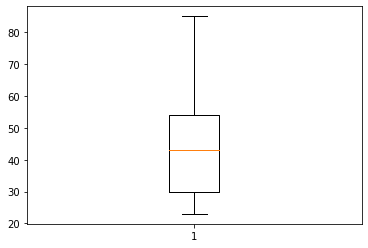

In [20]:
plt.boxplot(df_train['Age'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc4f606a450>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc4f606af10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc4f589c810>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc4f606f990>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc4f606fe90>],
 'means': []}

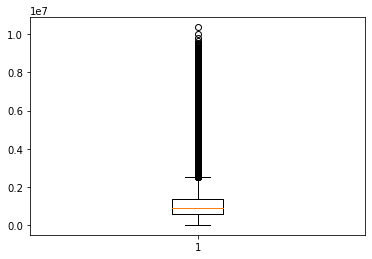

In [21]:
plt.boxplot(df_train['Avg_Account_Balance'])

In [22]:
# as i see there is outlier in avg_account_balance column so i check how many outlier are 

# first calculate iqr = q3 -q1
# lowerbound l = q1 - (1.5*iqr)
# upperbound u = q3 + (1.5 * iqr)

In [23]:
iqr = 1366666.00 - 604310.00
iqr

762356.0

In [24]:
l = 604310.00 -(1.5*762356.0)
l

-539224.0

In [25]:
u = 1366666.00 +(1.5*762356.0)
u

2510200.0

In [26]:
# check how many outlier here 
# count is 14612 this outlier is affect on our data and also prediction 
# total values is 245725 and outliers is 14612

df_train[(df_train.Avg_Account_Balance < l) | (df_train.Avg_Account_Balance > u)]

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
35,PML5FCBV,Female,29,RG284,Salaried,X1,26,No,2521592,No,0
71,HXSR7NXQ,Male,27,RG254,Salaried,X1,13,No,2824468,No,0
113,JAS9QVTW,Female,27,RG268,Salaried,X1,21,No,6278683,Yes,0
184,HW8HSYK3,Female,74,RG268,Other,X3,33,No,5878049,Yes,0
205,6OB4KY6J,Male,33,RG268,Other,X1,25,No,2952343,No,0
...,...,...,...,...,...,...,...,...,...,...,...
245638,GEPQVQKB,Male,48,RG283,Self_Employed,X2,31,No,5396737,No,0
245653,UKT5GX45,Male,46,RG257,Self_Employed,X1,26,Yes,6900312,No,1
245661,ASYCDDTY,Female,30,RG276,Salaried,X1,15,No,3566719,Yes,0
245676,2AYXS3T3,Male,35,RG253,Self_Employed,X2,61,No,2769973,Yes,0


In [27]:
# we have to remove this outliers

df_train.drop(df_train[df_train['Avg_Account_Balance']<l].index,inplace=True)
df_train.drop(df_train[df_train['Avg_Account_Balance']>u].index,inplace=True)

In [28]:
df_train.describe().round(2)

,Age,Vintage,Avg_Account_Balance,Is_Lead
count,231113.00,231113.00,231113.00,231113.00
mean,43.58,46.25,969370.68,0.24
std,14.70,32.01,500910.75,0.42
min,23.00,7.00,20790.00,0.00
25%,30.00,20.00,588281.00,0.00
50%,43.00,32.00,854934.00,0.00
75%,53.00,73.00,1252808.00,0.00
max,85.00,135.00,2509800.00,1.00


In [29]:
df_train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [30]:
# first i sepearte the columns which is drop 
# ID is not important for our criteria 

In [31]:
df_train.drop('ID',axis = 1, inplace = True)

In [32]:
df_train.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [33]:
# we check the test dataframe and we also done EDA cleaning etc.

df_test.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


In [34]:
# here we do EDA on test dataframe

EDA_test = df_test.drop('ID',axis = 1)

In [35]:
EDA_test.Credit_Product.mode()

0    No
dtype: object

In [36]:
EDA_test['Credit_Product'].fillna('No', inplace = True)   

In [37]:
EDA_test.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,Male,29,RG254,Other,X1,25,Yes,742366,No
1,Male,43,RG268,Other,X2,49,No,925537,No
2,Male,31,RG270,Salaried,X1,14,No,215949,No
3,Male,29,RG272,Other,X1,33,No,868070,No
4,Female,29,RG270,Other,X1,19,No,657087,No


In [38]:
# here we use labelencoding because both dataframe having categorical value we have to change into discrete values

from sklearn.preprocessing import LabelEncoder

gender_t = LabelEncoder()
region_code_t = LabelEncoder()
occupation_t = LabelEncoder()
channel_code_t = LabelEncoder()
credit_product_t = LabelEncoder()
is_active_t = LabelEncoder()

In [39]:
EDA_test['Gender'] = gender_t.fit_transform(EDA_test['Gender'])
EDA_test['Region_Code'] = region_code_t.fit_transform(EDA_test['Region_Code'])
EDA_test['Occupation'] = occupation_t.fit_transform(EDA_test['Occupation'])
EDA_test['Channel_Code'] = channel_code_t.fit_transform(EDA_test['Channel_Code'])
EDA_test['Credit_Product'] = credit_product_t.fit_transform(EDA_test['Credit_Product'])
EDA_test['Is_Active'] = is_active_t.fit_transform(EDA_test['Is_Active'])

In [40]:
EDA_test.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,1,29,4,1,0,25,1,742366,0
1,1,43,18,1,1,49,0,925537,0
2,1,31,20,2,0,14,0,215949,0
3,1,29,22,1,0,33,0,868070,0
4,0,29,20,1,0,19,0,657087,0


In [41]:

gender = LabelEncoder()
region_code = LabelEncoder()
occupation = LabelEncoder()
channel_code = LabelEncoder()
credit_product = LabelEncoder()
is_active = LabelEncoder()

In [42]:
df_train['Gender'] = gender.fit_transform(df_train['Gender'])
df_train['Region_Code'] = region_code.fit_transform(df_train['Region_Code'])
df_train['Occupation'] = occupation.fit_transform(df_train['Occupation'])
df_train['Channel_Code'] = channel_code.fit_transform(df_train['Channel_Code'])
df_train['Credit_Product'] = credit_product.fit_transform(df_train['Credit_Product'])
df_train['Is_Active'] = is_active.fit_transform(df_train['Is_Active'])

In [43]:
# here we split the data in X and Y .
# X is for input 
# Y is for target

X = df_train.drop('Is_Lead', axis = 1)
Y = df_train['Is_Lead']

In [44]:
df_train.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,0,73,18,1,2,43,0,1045696,0,0
1,0,30,27,2,0,32,0,581988,0,0
2,0,56,18,3,2,26,0,1484315,1,0
3,1,34,20,2,0,19,0,470454,0,0
4,0,30,32,2,0,33,0,886787,0,0


In [45]:
## doing k fold validation for which model is good the prediction
# import models

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.model_selection import cross_val_score

In [46]:
# create a different models

lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

In [47]:
# doing K fold cross validation here and check which model score is good

avg_lr = cross_val_score(lr, X,Y)
np.average(avg_lr)

0.7649548057063233

In [48]:
avg_lr = cross_val_score(DecisionTreeClassifier(),  X,Y)
np.average(avg_lr)

0.71095524011565

In [49]:
avg_lr = cross_val_score(RandomForestClassifier(n_estimators = 100),  X,Y)
np.average(avg_lr)

0.7809426554329806

In [50]:


model_params = {
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [10,20,25,30,35,40,45,50,55,60]
        }
    }     
}

In [51]:
# so as a see Randomforestclassifier gives best score but we also do some different n_estimators 
# here we use grid searchCV

# from sklearn.model_selection import GridSearchCV
# import pandas as pd
# scores = []

# for model_name, mp in model_params.items():
#     clf_grid =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
#     clf_grid.fit(X, Y)
#     scores.append({
#         'model': model_name,
#         'best_score': clf_grid.best_score_,
#         'best_params': clf_grid.best_params_
#     })
    
# df_gridCV = pd.DataFrame(scores,columns=['model','best_score','best_params'])
# df_gridCV

In [52]:
# here we use Randomised searchCV
# so as a see Randomforestclassifier gives best score but we also do some different n_estimators 

from sklearn.model_selection import RandomizedSearchCV
import pandas as pd
scores = []

for model_name, mp in model_params.items():
    clf_randomCV =  RandomizedSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf_randomCV.fit(X, Y)
  
    scores.append({
        'model': model_name,
        'best_score': clf_randomCV.best_score_,
        'best_params': clf_randomCV.best_params_
    })
    
df_randomCV = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_randomCV

,model,best_score,best_params
0,random_forest,0.780285,{'n_estimators': 60}


In [53]:
predict_lead = clf_randomCV.predict_proba(X)
predict_lead

array([[0.96666667, 0.03333333],
       [1.        , 0.        ],
       [0.85      , 0.15      ],
       ...,
       [0.98333333, 0.01666667],
       [0.98333333, 0.01666667],
       [0.98333333, 0.01666667]])

In [54]:
from sklearn.metrics import roc_auc_score

roc_auc_score(Y, predict_lead[:, 1])

0.9999999511122901

In [55]:
Is_Lead = clf_randomCV.predict(EDA_test)

In [56]:
Submission = pd.DataFrame(Is_Lead)

In [57]:
Submission = pd.concat([df_test['ID'], Submission], axis = 1)

In [58]:
Submission.rename({0 : 'Is_Lead'}, axis=1, inplace = True)

In [59]:
Submission.head()

,ID,Is_Lead
0,VBENBARO,0
1,CCMEWNKY,0
2,VK3KGA9M,0
3,TT8RPZVC,0
4,SHQZEYTZ,0


In [60]:
Submission.to_csv('Submission.csv', index = False)